# ch01.07 CNN기초 - Pooling Layer
---

* 날짜:
* 이름:

## 학습내용
    - CNN의 개념을 이해한다.
    - 텐서플로우를 이용해 CNN을 구성한다.
    - CNN 모델을 이용해 손글씨 이미지를 분류한다.
    - CNN의 feature map에 대해 이해한다.

## 데이터셋

* MNIST

```
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
```

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Pooling layer
---

풀링(Pooling) 연산은 커널과 스트라이드 개념이 존재한다는 점에서 합성곱 연산과 유사하지만, 학습해야 할 가중치가 없으며 연산 후에 채널 수가 변하지 않습니다. 일반적으로 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가하는 것이 일반적입니다. 


In [2]:
from tensorflow.keras.layers import MaxPool2D, AvgPool2D, Conv2D

### **| 맥스 풀링(Max Pooling)**
맥스풀링은 이미지 영역의 최대값 만을 출력값으로 가지는 연산 방법입니다. 



<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0107-01.PNG?raw=true width=400>
</p>



In [3]:
x = np.array([1,0,1,1,1,2,0,0,1,0,1,0,0,0,1,1], dtype='float16').reshape(1,4,4,1)
print(x[0,:,:,0], x.shape)
y = MaxPool2D(pool_size=2, strides=1)(x) # kernel_size = pool_size
print(y[0,:,:,0], y.shape)

[[1. 0. 1. 1.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]] (1, 4, 4, 1)
tf.Tensor(
[[2. 2. 1.]
 [2. 2. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32) (1, 3, 3, 1)


### **| 평균 풀링(Average Pooling)**


평균풀링은 이미지 영역의 평균값 을 출력값으로 가지는 연산 방법입니다. 


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0107-02.PNG?raw=true width=400>
</p>





In [4]:
x = np.array([1,0,1,1,1,2,0,0,1,0,1,0,0,0,1,1], dtype='float16').reshape(1,4,4,1)
print(x[0,:,:,0], x.shape)
y = AvgPool2D(pool_size=2, strides=1)(x) # kernel_size = pool_size
print(y[0,:,:,0], y.shape)

[[1. 0. 1. 1.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]] (1, 4, 4, 1)
tf.Tensor(
[[1.   0.75 0.5 ]
 [1.   0.75 0.25]
 [0.25 0.5  0.75]], shape=(3, 3), dtype=float32) (1, 3, 3, 1)


## LeNet-5
---

LeNet-5[(논문)](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) 구조는 아마도 가장 널리 알려진 CNN 구조일 것입니다. 이 구조는 1998년 얀 르쿤이 만들었으며 손글씨 숫자 인식(MNIST)에 널리 사용되었습니다. 


![](https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg)

### | LeNet-5을 이용한 손글씨 이미지 분류

####  **데이터 준비**

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 전처리-정규화
x_train, x_test = x_train/255.0 , x_test/255.0
# 전처리-shape 맞추기
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


#### **모델 구성**

In [6]:
from tensorflow.keras import layers, models, utils

def build_lenet5():
  x = layers.Input(shape=(28,28,1))
  y = layers.Conv2D(filters=6, kernel_size=5, padding='same', activation='tanh')(x)
  y = layers.AvgPool2D(pool_size=2, strides=2)(y) #
  y = layers.Conv2D(filters=16, kernel_size=5, padding='valid', activation='tanh')(y) 
  y = layers.MaxPool2D(pool_size=2, strides=2)(y) #
  y=layers.Flatten()(y)
  y=layers.Dense(120, activation='tanh')(y)
  y=layers.Dense(84, activation='tanh')(y)
  y=layers.Dense(10, activation='softmax')(y)
  model=tf.keras.models.Model(x,y)
  return model


#### **학습 및 평가**

In [7]:
model = build_lenet5()
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)
print('===============================================테스트 스코어===============================================')
model.evaluate(x_test, y_test)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_1 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0     

[0.045146673917770386, 0.9853000044822693]

### **| Feature map**

#### **feature map 얻기**

In [8]:
layer_outputs = [layer.output for layer in model.layers] # 레이어의 아웃풋 = 데이터 변환과정
model_output_by_layer = models.Model(inputs=model.input, outputs=layer_outputs) # 모든 레이어의 아웃풋 획득
print(len(layer_outputs))
x_pred_maps = model_output_by_layer(x_test)

for x_pred_map in x_pred_maps:
  print(x_pred_map.shape)
cnn_layers = [1,2,3,4]
dnn_layers = [5,6,7,8]

9
(10000, 28, 28, 1)
(10000, 28, 28, 6)
(10000, 14, 14, 6)
(10000, 10, 10, 16)
(10000, 5, 5, 16)
(10000, 400)
(10000, 120)
(10000, 84)
(10000, 10)


#### **시각화**

![](https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg)

[시각화 함수 스크립트](https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/scripts/featuremap_dict.py)

In [9]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

def show_featuremap(sample_idx, fmaps, cnn_idxs, flatten_idxs):
  for idx in cnn_idxs:
    fmap = fmaps[idx][sample_idx]
    chs = fmap.shape[2]
    print(f'{idx} 번째 Convolutional 레이어 {fmap.shape}')
    for ch in range(chs):
      plt.subplot(1,chs,ch+1)
      plt.imshow(fmap[:,:,ch], cmap='gray')
      plt.xticks([]);plt.yticks([])
    plt.show()

  for idx in flatten_idxs:
    fmap = fmaps[idx][sample_idx]
    print(f'{idx} 번째 Dense 레이어 {fmap.shape}')
    plt.figure(figsize=(int(len(fmap)/5),10))
    plt.imshow(tf.reshape(fmap,(1,len(fmap))), cmap='gray')
    plt.xticks(range(10));plt.yticks([]);plt.show()

1 번째 Convolutional 레이어 (28, 28, 6)


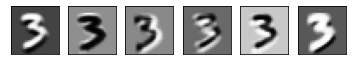

2 번째 Convolutional 레이어 (14, 14, 6)


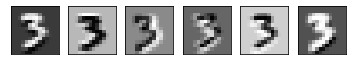

3 번째 Convolutional 레이어 (10, 10, 16)


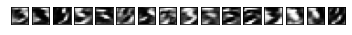

4 번째 Convolutional 레이어 (5, 5, 16)


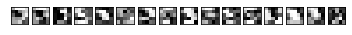

5 번째 Dense 레이어 (400,)


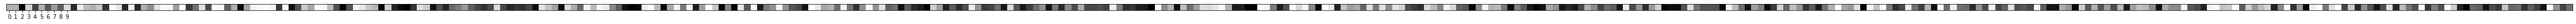

6 번째 Dense 레이어 (120,)


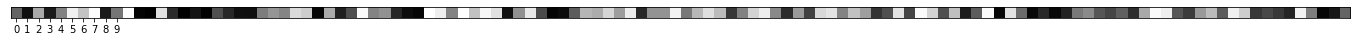

7 번째 Dense 레이어 (84,)


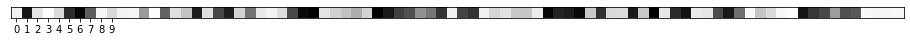

8 번째 Dense 레이어 (10,)


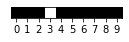

In [10]:
sample_idx = 30
show_featuremap(sample_idx, x_pred_maps, cnn_layers, dnn_layers)

## 과제 1. 의류 이미지 분류
---
* 데이터셋 : f-minst(fashoin mnist)
* 데이터를 소개하세요.
* 데이터의 형태를 파악하세요
* 적절한 모델을 생성하세요
* 데이터에 적합하게 학습을 진행하세요.

* 0 : T-shirt/top
* 1 : Trouser
* 2 : Pullover
* 3 : Dress
* 4 : Coat
* 5 : Sandal
* 6 : Shirt
* 7 : Sneaker
* 8 : Bag
* 9 : Ankel boot

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


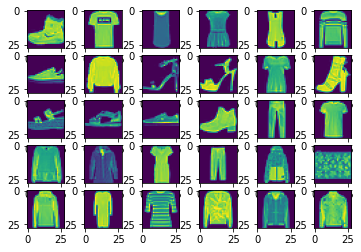

In [12]:
for i in range(30):
  plt.subplot(5,6,1+i);plt.imshow(x_train[i]);

In [13]:
# 전처리-정규화
x_train, x_test = x_train/255.0 , x_test/255.0
# 전처리-shape 맞추기
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [14]:
def build_lenet5():
  x = layers.Input(shape=(28,28,1))
  y = layers.Conv2D(filters=6, kernel_size=5, padding='same', activation='tanh')(x)
  y = layers.AvgPool2D(pool_size=2, strides=2)(y) #
  y = layers.Conv2D(filters=16, kernel_size=5, padding='valid', activation='tanh')(y) 
  y = layers.MaxPool2D(pool_size=2, strides=2)(y) #
  y=layers.Flatten()(y)
  y=layers.Dense(120, activation='tanh')(y)
  y=layers.Dense(84, activation='tanh')(y)
  y=layers.Dense(10, activation='softmax')(y)
  model=tf.keras.models.Model(x,y)
  return model

In [15]:
model = build_lenet5()
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)
print('===============================================테스트 스코어===============================================')
model.evaluate(x_test, y_test)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0   

[0.2917948365211487, 0.8984000086784363]

In [16]:
layer_outputs = [layer.output for layer in model.layers] # 레이어의 아웃풋 = 데이터 변환과정
model_output_by_layer = models.Model(inputs=model.input, outputs=layer_outputs) # 모든 레이어의 아웃풋 획득
print(len(layer_outputs))
x_pred_maps = model_output_by_layer(x_test)

for x_pred_map in x_pred_maps:
  print(x_pred_map.shape)
cnn_layers = [1,2,3,4]
dnn_layers = [5,6,7,8]

9
(10000, 28, 28, 1)
(10000, 28, 28, 6)
(10000, 14, 14, 6)
(10000, 10, 10, 16)
(10000, 5, 5, 16)
(10000, 400)
(10000, 120)
(10000, 84)
(10000, 10)


In [17]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

def show_featuremap(sample_idx, fmaps, cnn_idxs, flatten_idxs):
  for idx in cnn_idxs:
    fmap = fmaps[idx][sample_idx]
    chs = fmap.shape[2]
    print(f'{idx} 번째 Convolutional 레이어 {fmap.shape}')
    for ch in range(chs):
      plt.subplot(1,chs,ch+1)
      plt.imshow(fmap[:,:,ch], cmap='gray')
      plt.xticks([]);plt.yticks([])
    plt.show()

  for idx in flatten_idxs:
    fmap = fmaps[idx][sample_idx]
    print(f'{idx} 번째 Dense 레이어 {fmap.shape}')
    plt.figure(figsize=(int(len(fmap)/5),10))
    plt.imshow(tf.reshape(fmap,(1,len(fmap))), cmap='gray')
    plt.xticks(range(10));plt.yticks([]);plt.show()

1 번째 Convolutional 레이어 (28, 28, 6)


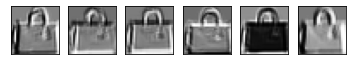

2 번째 Convolutional 레이어 (14, 14, 6)


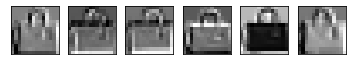

3 번째 Convolutional 레이어 (10, 10, 16)


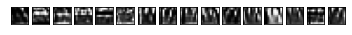

4 번째 Convolutional 레이어 (5, 5, 16)


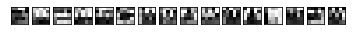

5 번째 Dense 레이어 (400,)


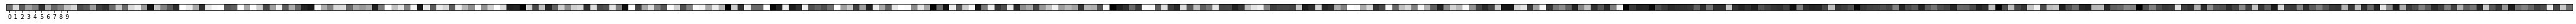

6 번째 Dense 레이어 (120,)


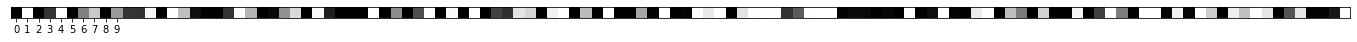

7 번째 Dense 레이어 (84,)


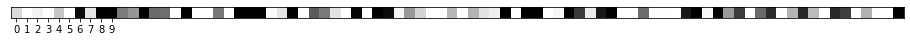

8 번째 Dense 레이어 (10,)


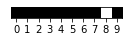

In [18]:
sample_idx = 30
show_featuremap(sample_idx, x_pred_maps, cnn_layers, dnn_layers)

## 과제 2. 동물 및 물체 이미지 분류
---
* 데이터셋 : cifar-10
* 데이터의 형태를 파악하세요
* 적절한 모델을 생성하세요
* 데이터를 학습하세요.

* 0 : airplane
* 1 : automobile
* 2 : bird
* 3 : cat
* 4 : deer
* 5 : dog
* 6 : frog
* 7 : horse
* 8 : ship
* 9 : truck

In [22]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


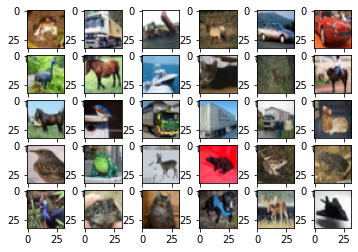

In [23]:
for i in range(30):
  plt.subplot(5,6,1+i);plt.imshow(x_train[i]);

In [27]:
# 전처리-정규화
x_train, x_test = x_train/255.0 , x_test/255.0

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [30]:
def build_lenet5():
  x = layers.Input(shape=(32,32,3))
  y = layers.Conv2D(filters=6, kernel_size=5, padding='same', activation='relu')(x)
  y = layers.AvgPool2D(pool_size=2, strides=2)(y) #
  y = layers.Conv2D(filters=16, kernel_size=5, padding='valid', activation='relu')(y) 
  y = layers.MaxPool2D(pool_size=2, strides=2)(y) #
  y=layers.Flatten()(y)
  y=layers.Dense(120, activation='tanh')(y)
  y=layers.Dense(84, activation='tanh')(y)
  y=layers.Dense(10, activation='softmax')(y)
  model=tf.keras.models.Model(x,y)
  return model

In [31]:
model = build_lenet5()
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)
print('===============================================테스트 스코어===============================================')
model.evaluate(x_test, y_test)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d_5 (Averag  (None, 16, 16, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 576)               0   

[2.302659749984741, 0.10000000149011612]

In [35]:
layer_outputs = [layer.output for layer in model.layers] # 레이어의 아웃풋 = 데이터 변환과정
model_output_by_layer = models.Model(inputs=model.input, outputs=layer_outputs) # 모든 레이어의 아웃풋 획득
print(len(layer_outputs))
x_pred_maps = model_output_by_layer(x_test)

for x_pred_map in x_pred_maps:
  print(x_pred_map.shape)
cnn_layers = [0,2,3,4]
dnn_layers = [5,6,7,8]

9
(10000, 32, 32, 3)
(10000, 32, 32, 6)
(10000, 16, 16, 6)
(10000, 12, 12, 16)
(10000, 6, 6, 16)
(10000, 576)
(10000, 120)
(10000, 84)
(10000, 10)


0 번째 Convolutional 레이어 (32, 32, 3)


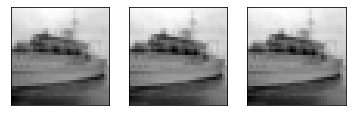

2 번째 Convolutional 레이어 (16, 16, 6)


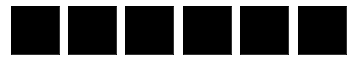

3 번째 Convolutional 레이어 (12, 12, 16)


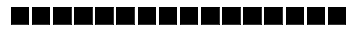

4 번째 Convolutional 레이어 (6, 6, 16)


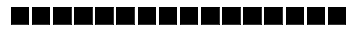

5 번째 Dense 레이어 (576,)


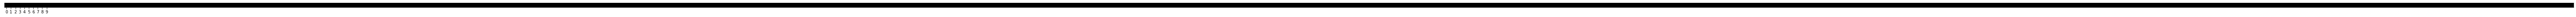

6 번째 Dense 레이어 (120,)


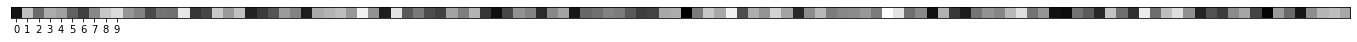

7 번째 Dense 레이어 (84,)


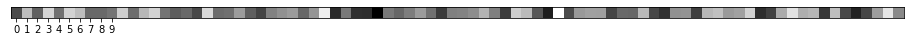

8 번째 Dense 레이어 (10,)


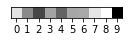

In [36]:
sample_idx = 80
show_featuremap(sample_idx, x_pred_maps, cnn_layers, dnn_layers)